In [1]:
# Thompson Sampling for Slot Machines

# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns

# Setting conversion rates and the number of samples
conversionRates = [0.15, 0.04, 0.13, 0.11, 0.05]
N = 10000
d = len(conversionRates)

# Creating the dataset
X = np.zeros((N, d))
for i in range(N):
    for j in range(d):
        if np.random.rand() < conversionRates[j]:
            X[i][j] = 1

# Making arrays to count our losses and wins
nPosReward = np.zeros(d)
nNegReward = np.zeros(d)

# Taking our best slot machine through beta distibution and updating its losses and wins
for i in range(N):
    selected = 0
    maxRandom = 0
    for j in range(d):
        randomBeta = np.random.beta(nPosReward[j] + 1, nNegReward[j] + 1)
        if randomBeta > maxRandom:
            maxRandom = randomBeta
            selected = j
    if X[i][selected] == 1:
        nPosReward[selected] += 1
    else:
        nNegReward[selected] += 1

# Showing which slot machine is considered the best
nSelected = nPosReward + nNegReward 
for i in range(d):
    print('Machine number ' + str(i + 1) + ' was selected ' + str(nSelected[i]) + ' times')
print('Conclusion: Best machine is machine number ' + str(np.argmax(nSelected) + 1))


Machine number 1 was selected 8668.0 times
Machine number 2 was selected 40.0 times
Machine number 3 was selected 621.0 times
Machine number 4 was selected 578.0 times
Machine number 5 was selected 93.0 times
Conclusion: Best machine is machine number 1


In [2]:
# Models comparison

import numpy as np
import pandas as pd

N = [200, 1000, 5000]
D = 20
convRanges = [(0., 0.1), (0., 0.3), (0., 0.5)]

results = list()
for n in N:
    for ranges in convRanges:
        results.append([])
        for d  in range(3, D + 1):
            p1 = 0
            p2 = 0

            for rounds in range(1000):
                
                conversionRates = list()
                for i in range(d):
                    conversionRates.append(np.random.uniform(low = ranges[0], high = ranges[1]))
                    
                X = np.zeros((n,d))
                for i in range(n):
                    for j in range(d):
                        if np.random.rand() < conversionRates[j]:
                            X[i][j] = 1
                
                nPosReward = np.zeros(d)
                nNegReward = np.zeros(d)
                
                for i in range(n):
                    selected = 0
                    maxRandom = 0
                    
                    for j in range(d):
                        randomBeta = np.random.beta(nPosReward[j] + 1, nNegReward[j] + 1)
                        if randomBeta > maxRandom:
                            maxRandom = randomBeta
                            selected = j
                        
                    if X[i][selected] == 1:
                        nPosReward[selected] += 1
                    else:
                        nNegReward[selected] += 1
                
                nSelected = nPosReward + nNegReward
                
                left = n - max(nSelected)
                
                countStandard = np.zeros(d)
                
                x = int(left / d)
                for i in range(x):
                    for j in range(d):
                        if X[i][j] == 1:
                            countStandard[j] += 1
                
                bestStandard = np.argmax(countStandard)
                bestReal = np.argmax(conversionRates)
                bestTS = np.argmax(nSelected)

                if bestTS == bestReal:
                    p1 += 1
                if bestStandard == bestReal:
                    p2 += 1
                
            print('N = ' + str(n) + ' d = ' + str(d) + ' range = ' + str(ranges) + ' | result Thompson Sampling = ' + str(p1) + ' result Standard solution = ' + str(p2))
            results.append([n, ranges, d, p1, p2])
                
df = pd.DataFrame(results)
df.to_excel('results.xlsx', sheet_name = 'Result', index = False)

N = 200 d = 3 range = (0.0, 0.1) | result Thompson Sampling = 659 result Standard solution = 584
N = 200 d = 4 range = (0.0, 0.1) | result Thompson Sampling = 530 result Standard solution = 487
N = 200 d = 5 range = (0.0, 0.1) | result Thompson Sampling = 489 result Standard solution = 402
N = 200 d = 6 range = (0.0, 0.1) | result Thompson Sampling = 424 result Standard solution = 379
N = 200 d = 7 range = (0.0, 0.1) | result Thompson Sampling = 372 result Standard solution = 331
N = 200 d = 8 range = (0.0, 0.1) | result Thompson Sampling = 331 result Standard solution = 288
N = 200 d = 9 range = (0.0, 0.1) | result Thompson Sampling = 290 result Standard solution = 253
N = 200 d = 10 range = (0.0, 0.1) | result Thompson Sampling = 269 result Standard solution = 252
N = 200 d = 11 range = (0.0, 0.1) | result Thompson Sampling = 251 result Standard solution = 225
N = 200 d = 12 range = (0.0, 0.1) | result Thompson Sampling = 239 result Standard solution = 221
N = 200 d = 13 range = (0.0

[Text(0, 0.5, 'Standard Solution'),
 Text(0.5, 0, 'Thompson Sample'),
 Text(0.5, 1.0, 'Percent Gain')]

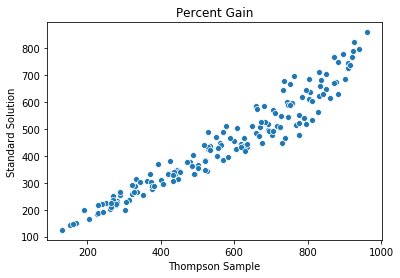

In [20]:
sns.scatterplot(df[3], df[4]).set(xlabel='Thompson Sample', ylabel='Standard Solution', title='Percent Gain')

[Text(0, 0.5, 'Thompson Sample Percentage Gain'),
 Text(0.5, 0, 'N'),
 Text(0.5, 1.0, 'Percent Gain per N')]

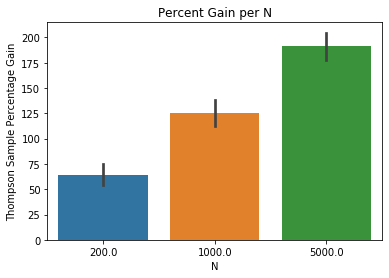

In [19]:
sns.barplot(df[0], df[3]-df[4]).set(xlabel='N', ylabel='Thompson Sample Percentage Gain', title='Percent Gain per N')

### Analysis / Report

In the example from above, the environment that we are working in is utilizing the Thompson Sampling Model to maximize the output, or reward, of slot machines. We are presented, and have tested, different number of slot machines, conversion rate ranges, and number of smaples. When looking at the first output we can see that the best slot machine that yields the highest reward is machine number 1. When comparing the Thompson sampling to the standard solution the percentage gain for each number of slot machines was positive, with more slot machines the more percentage gain. Having a Christian worldview we must always take into account and be mindful of how the data was gathered and generated, and validate any bias of the analysis. We have a responsibility to have integrity when presenting results. We must have diligence when presented with a data set and run thorough checks to run an analysis on the data set.